# Visualise AmpC beta-lactamase datasets

## Load Data 

just loading dockscore to keep memory low!

In [2]:
import pandas as pd
from math import log, floor

def human_len(some_list):
    number = len(some_list)
    units = ['', 'K', 'M', 'G', 'T', 'P']
    k = 1000.0
    magnitude = int(floor(log(number, k)))
    return '%.2f%s' % (number / k**magnitude, units[magnitude])

df = pd.read_csv('../datasets/AmpC_screen_table.csv', usecols=['dockscore'])

print(f'Length of dataset: {human_len(df)}')
df = df.query('dockscore != "no_score"')
print(f'Length of dataset with valid dockscores: {human_len(df)}')

/tmp/ipykernel_251122/4260678461.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../datasets/AmpC_screen_table.csv', usecols=['dockscore'])


  dockscore
0    -38.28
1    -16.38
2    -25.99
3    -50.48
4    -29.26


## Plot Docking Dockscore

Text(0.5, 0.98, 'AmpC Dock Score Histogram (N=96214206')

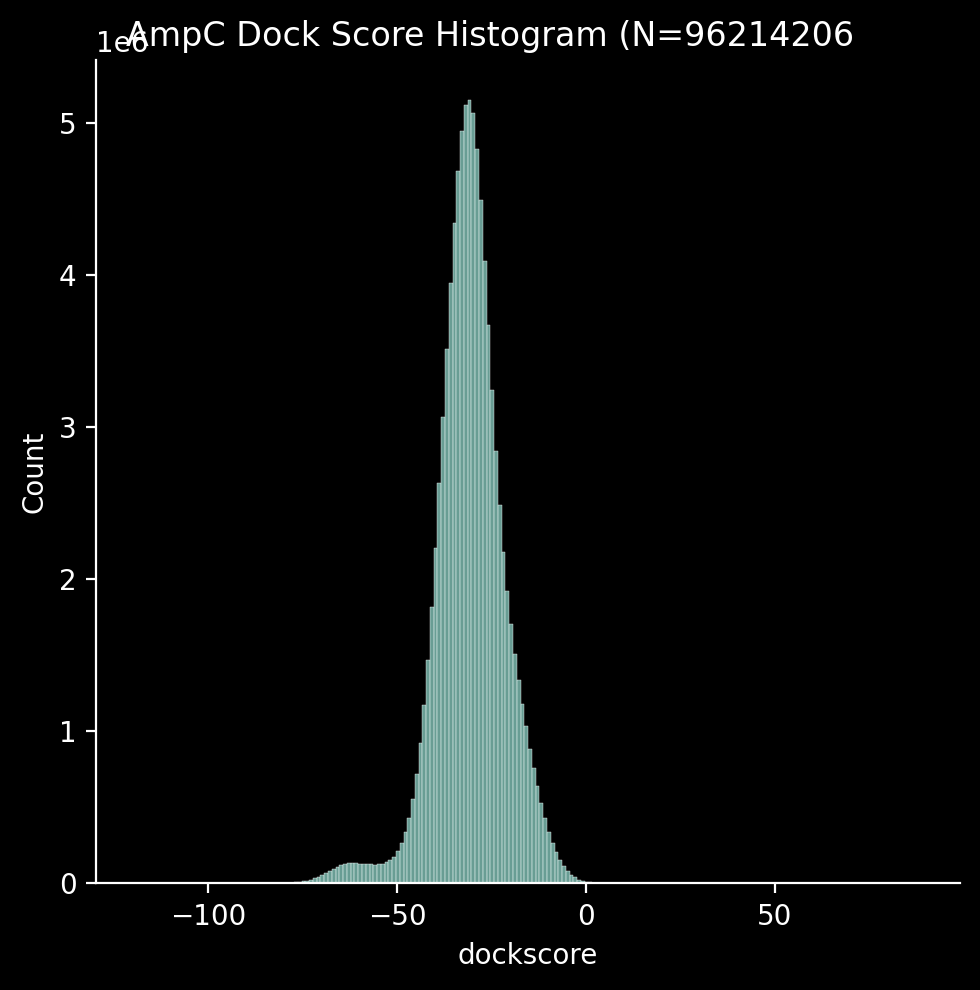

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

plt = sns.displot(df.dockscore)
plt.fig.suptitle(f'AmpC Dock Score Histogram (N={human_len(df)})')

## Dummy checks

How good is a model that just predicts the mean for everything?

In [16]:
import numpy as np
from scipy.stats import spearmanr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y = df['dockscore'].astype(float).values
noise = np.random.normal(0, 1, len(y))
mean_model = np.mean(y)*np.ones_like(y)+noise

print(f'Mean model predicts constant value {np.mean(y):.3f} + added random noise from N(0,1)')
print(f'MSE of mean model: {mean_squared_error(y, mean_model):.3f}')
print(f'R2 score of mean model: {r2_score(y, mean_model):.3f}')
print(f'Spearman rho of mean model: {spearmanr(y, mean_model)[0]:.3f}')

MSE of mean model: 87.875
R2 score of mean model: -0.012
Spearman rho of mean model: 0.000


## Load Activity Data

In [ ]:
df_activity = pd.read_csv('../datasets/AmpC_activity.csv')